In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
dtf = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train.csv", index_col='ID')

In [6]:
dtf.head()

,Time,HRV (ms),GSR (μS),EEG Power Bands,Blood Pressure (mmHg),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Cognitive Load,Mood State,Psychological State,Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Task Type,Age,Gender,Educational Level,Study Major
ID,,,,,,,,,,,,,,,,,,,
1,2024-01-01 00:00:00,33.039739,1.031806,"[0.7583653347946298, 1.423247998317594, 0.6157...",114/79,98.433312,98,56.863054,Low,Anxious,Stressed,21,34.566484,27,Exam,22,Female,Postgraduate,Engineering
2,2024-01-01 00:00:01,49.914651,1.340983,"[0.5520419333516282, 1.858065835142619, 0.3766...",113/86,98.944505,70,45.343430,Low,Neutral,Stressed,21,35.358593,282,Assignment,23,Male,Undergraduate,Arts
3,2024-01-01 00:00:02,67.894401,1.006014,"[1.0261365005886114, 1.3504934190994182, 2.308...",124/74,95.990753,91,50.029264,High,Sad,Relaxed,17,34.359495,50,Group Discussion,18,Female,Postgraduate,Arts
4,2024-01-01 00:00:03,34.705373,0.849270,"[1.6075723109471591, 1.6619672129812242, 0.344...",120/73,98.173643,95,60.802104,Low,Neutral,Anxious,12,34.802638,223,Exam,28,Female,High School,Engineering
5,2024-01-01 00:00:04,52.896549,0.879084,"[1.055003922514022, 0.7643319894343756, 1.0745...",111/80,96.225051,65,40.696384,High,Anxious,Stressed,14,35.869862,201,Group Discussion,24,Female,High School,Engineering


In [7]:
dtf.describe()

,HRV (ms),GSR (μS),Oxygen Saturation (%),Heart Rate (BPM),Ambient Noise (dB),Respiration Rate (BPM),Skin Temp (°C),Focus Duration (s),Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.920454,0.995749,97.419577,78.829000,49.825774,18.061000,34.988254,154.499000,23.477000
std,9.863658,0.285758,1.442865,11.818097,11.745028,3.719558,0.567596,84.098922,3.420698
min,17.405557,0.501567,95.001452,60.000000,30.017619,12.000000,34.001039,10.000000,18.000000
25%,43.019097,0.736509,96.154447,68.000000,39.462492,15.000000,34.512701,83.750000,21.000000
50%,49.982476,0.999965,97.395945,78.000000,50.012015,18.000000,34.974199,156.000000,23.000000
75%,56.538365,1.239964,98.643364,89.000000,59.690683,21.000000,35.459442,227.000000,27.000000
max,78.841149,1.499563,99.997277,99.000000,69.902683,24.000000,35.997964,299.000000,29.000000


# Explaination 1:
A very straightforward analysis of the data at our hand, and how our sample looks.

Shows the different psychological states of the data with size.

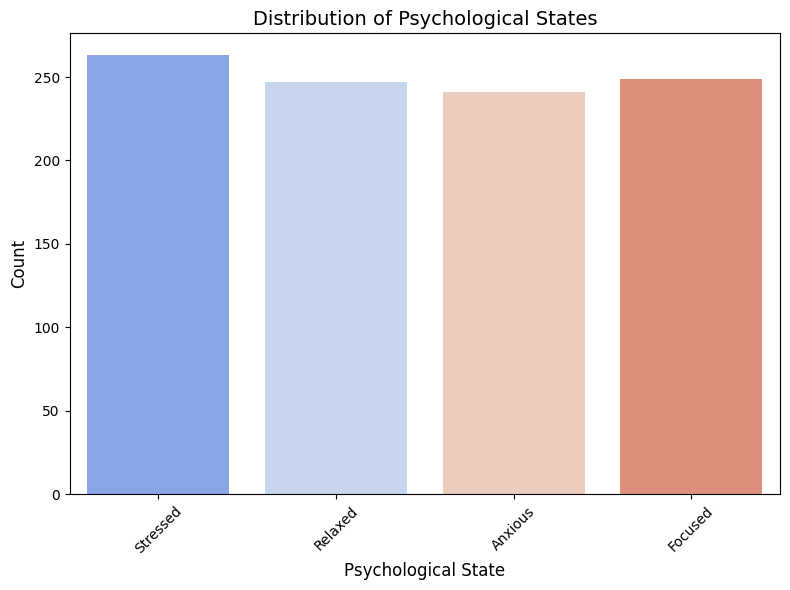

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Psychological State', data=dtf, palette='coolwarm')
plt.title("Distribution of Psychological States", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 2:
Shows the average focus duration on tasks by type of task and the psychological state of the data.

I've always thought that stressed people would have a harder time focusing on a task for a duration of time, but it seems that the data indicates otherwise; or atleast doesn't have a major effect or the sample size is too small to determine.


<Figure size 1200x600 with 0 Axes>

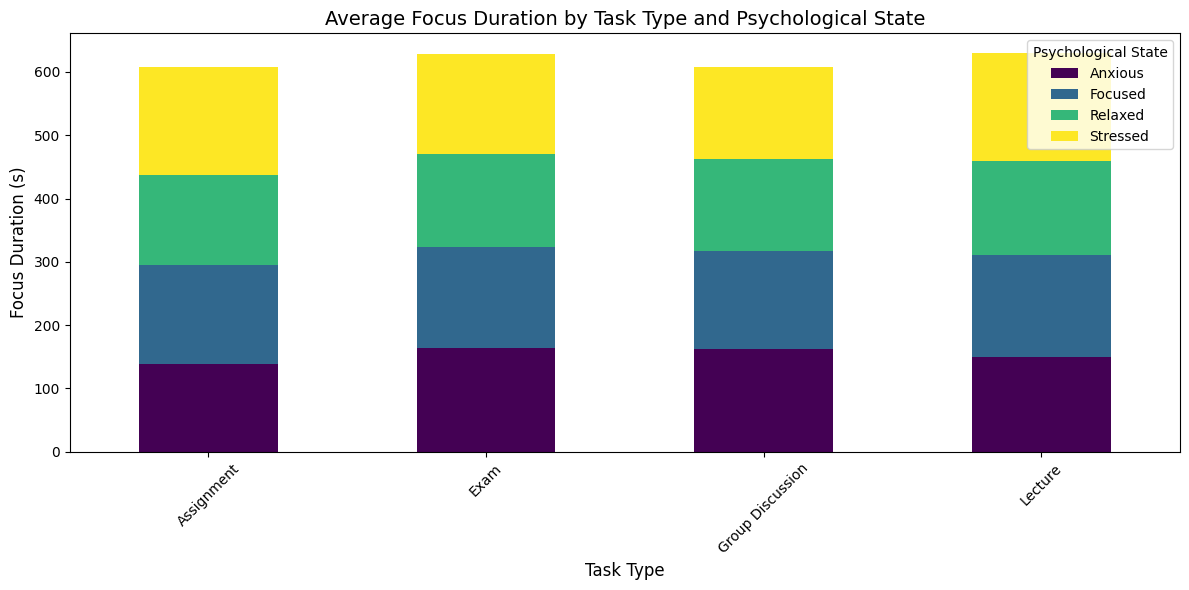

In [11]:
plt.figure(figsize=(12, 6))
task_focus = dtf.groupby(['Task Type', 'Psychological State'])['Focus Duration (s)'].mean().unstack()
task_focus.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6))
plt.title("Average Focus Duration by Task Type and Psychological State", fontsize=14)
plt.xlabel("Task Type", fontsize=12)
plt.ylabel("Focus Duration (s)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 3:
Heart rate distribution by psychological state.

the difference in heartbeat between relaxed people and stressed people is negligable, but the difference in heartbeat between focused people and the rest of the sample group is quite significant, which is interesting.

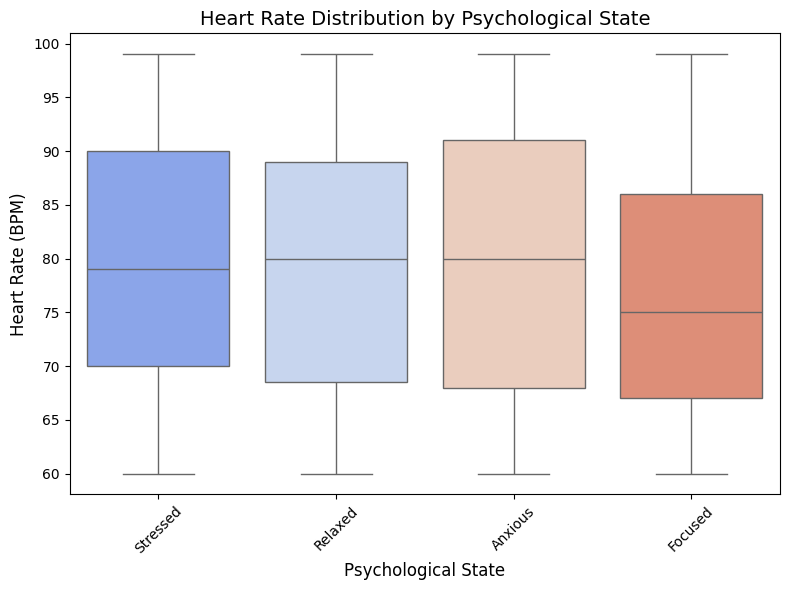

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Psychological State', y='Heart Rate (BPM)', data=dtf, palette='coolwarm')
plt.title("Heart Rate Distribution by Psychological State", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Heart Rate (BPM)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explaination 4:
relevant background:

**HRV** - Heart Rate Variability and **GSR** - Galvanic Skin Response

**GSR** is defined by this:
the change in the skin's electrical properties due to emotional arousal and stress

**HRV** is defined by this:
where the amount of time between your heartbeats fluctuates slightly


a scatter diagram was chosen because they're both numerical values, to detect possible correlation between the data.

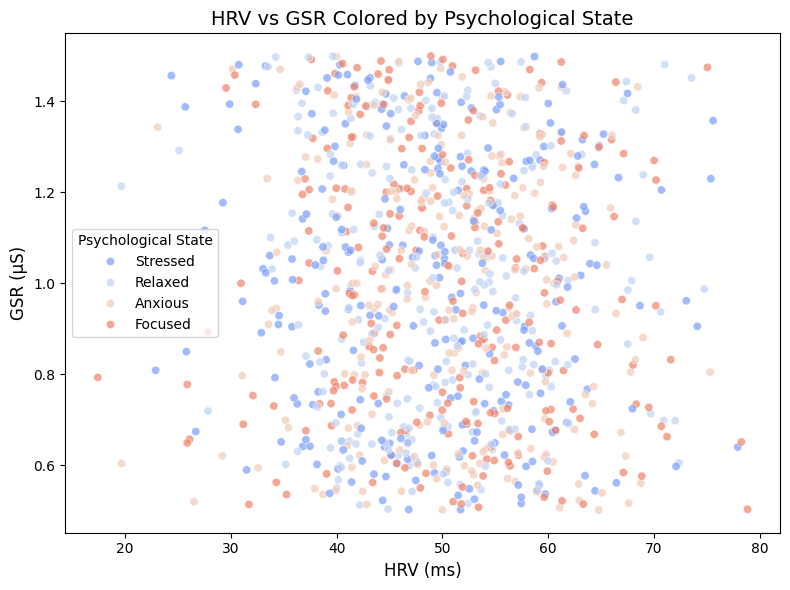

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HRV (ms)', y='GSR (μS)', hue='Psychological State', data=dtf, palette='coolwarm', alpha=0.7)
plt.title("HRV vs GSR Colored by Psychological State", fontsize=14)
plt.xlabel("HRV (ms)", fontsize=12)
plt.ylabel("GSR (μS)", fontsize=12)
plt.legend(title="Psychological State")
plt.tight_layout()
plt.show()


# Explaination 5:
boxplot provides insights into how age varies across different psychological states.



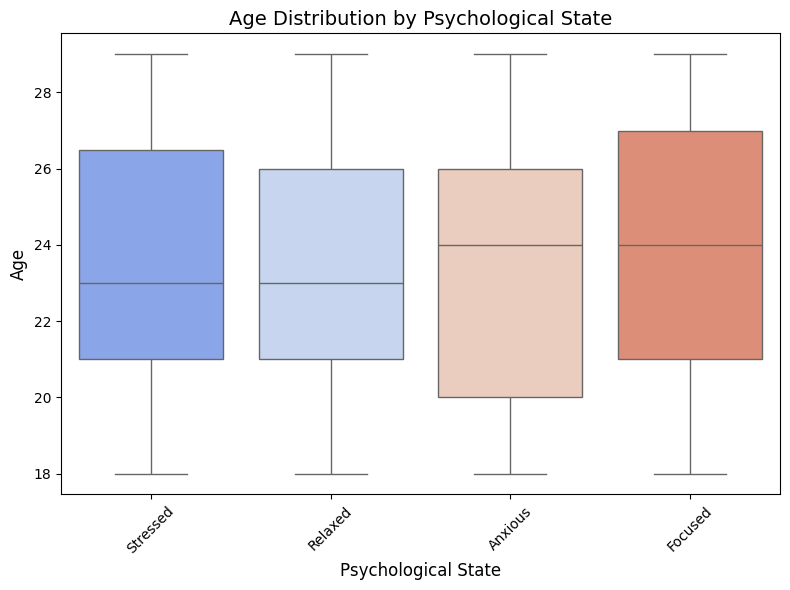

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Psychological State', y='Age', data=dtf, palette='coolwarm')
plt.title("Age Distribution by Psychological State", fontsize=14)
plt.xlabel("Psychological State", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Part 3 - Basic Model Pipeline:



In [14]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#There was a problem with non-numeric columns, like Stressed, Anxious and Focused etc..
#In order to solve it i've put them in numeric values like Stressed = 0, Anxious = 1 etc..
# Identify and preprocess non-numeric columns
categorical_cols = ['Cognitive Load', 'Mood State', 'Task Type', 'Gender', 'Educational Level', 'Study Major', 'Blood Pressure (mmHg)']
time_col = ['Time']  # Assuming "Time" needs to be processed or excluded
numeric_cols = ['HRV (ms)', 'GSR (μS)', 'Oxygen Saturation (%)', 'Heart Rate (BPM)',
                'Ambient Noise (dB)', 'Respiration Rate (BPM)', 'Skin Temp (°C)', 'Focus Duration (s)', 'Age']

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    dtf[col] = le.fit_transform(dtf[col])
    label_encoders[col] = le

# Optional: Drop or preprocess columns like "Time" or "EEG Power Bands"
dtf = dtf.drop(columns=time_col + ['EEG Power Bands'])

# Split features and target
X = dtf.drop(columns=['Psychological State'])  # Replace 'Psychological State' with your target column name
y = dtf['Psychological State']

# Encode target if necessary
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1.6944891436503702
R-squared: -0.40182340145111084


# Error analysis:

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred
absolute_errors = np.abs(residuals)

# Convert y_test to a Pandas Series if needed
y_test_series = pd.Series(y_test, index=X_test.index)

# Identify the worst predictions
worst_indices = np.argsort(absolute_errors)[-5:]  # Top 5 worst errors
worst_samples = X_test.iloc[worst_indices]
worst_true = y_test_series.iloc[worst_indices]
worst_pred = y_pred[worst_indices]

# 3. Analyze feature importance
feature_importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Residual histogram

Residual = Actual value - Predicted value


The residual histogram helps us determine if the model is overestimating or underestimating.

We can see that there are some mistakes but overall the model is performing adequately.

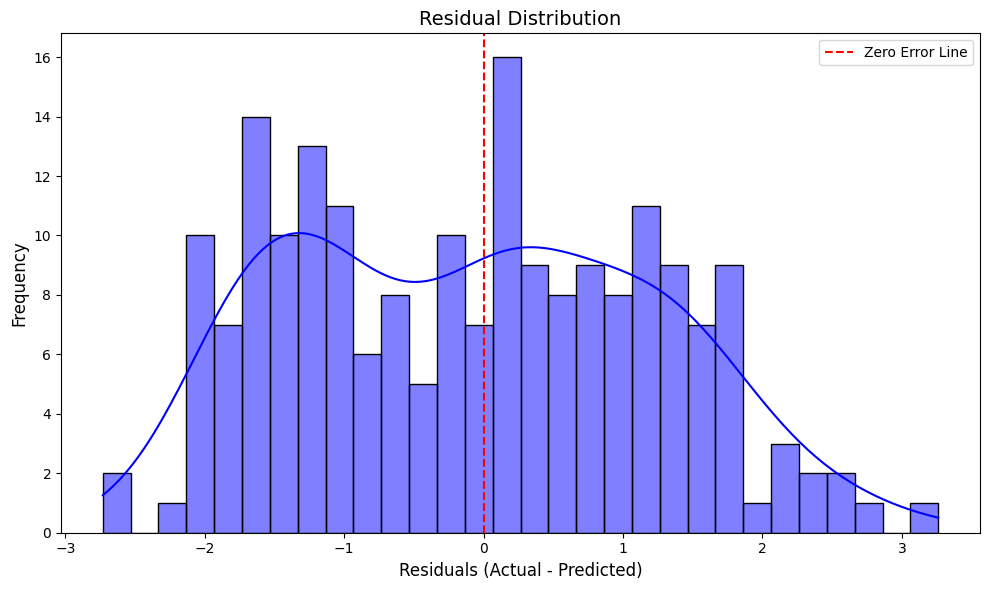

In [33]:
# 1. Visualize residuals to check for overestimations/underestimations
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="blue")
plt.title("Residual Distribution", fontsize=14)
plt.xlabel("Residuals (Actual - Predicted)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.axvline(0, color='red', linestyle='--', label="Zero Error Line")
plt.legend()
plt.tight_layout()
plt.show()

#Worst Predictors:

We can see that there are "problematic" samples, and that in every domain the model performed on them poorly.


We can see that on outliers (true value = 3) the model is performing quite poorly, but it might be due to a small sample.

In [34]:
worst_df = pd.DataFrame({
    "True Value": worst_true.values,
    "Predicted Value": worst_pred,
    "Absolute Error": absolute_errors[worst_indices]
}, index=worst_samples.index)

# Include the features from the dataset
worst_df = pd.concat([worst_samples, worst_df], axis=1)

print("Top 10 Most Problematic Predictions:")
print(worst_df)
print("This will help us identify where the model might struggle")
print("Top 10 Worst Predictions:")
print(worst_df)



Top 10 Most Problematic Predictions:
      HRV (ms)  GSR (μS)  Blood Pressure (mmHg)  Oxygen Saturation (%)  \
ID                                                                       
550  48.799095  1.004808                    347              98.094000   
960  39.330539  0.538230                    350              99.247920   
61   55.635797  1.264997                    372              96.544937   
750  62.796625  1.279719                    127              99.739123   
372  47.480142  0.566597                    186              97.807355   

     Heart Rate (BPM)  Ambient Noise (dB)  Cognitive Load  Mood State  \
ID                                                                      
550                96           30.488829               1           0   
960                75           59.348819               0           3   
61                 97           46.036737               0           3   
750                65           53.997054               2           3   
372   

# Feature Importance

Highlights features most influential to the model, Identifies features that may require refinement or removal if they contribute to errors.

it seems that **HRV** has a very small impact on the data and might be irrelevant to the model.

Also the "**Task Type**" which intuitively should be an important part of the model also shows low importance. This might imply that the "**Task Type**" data that was collected does not adequately differentiate between psychological states or is not well-represented.

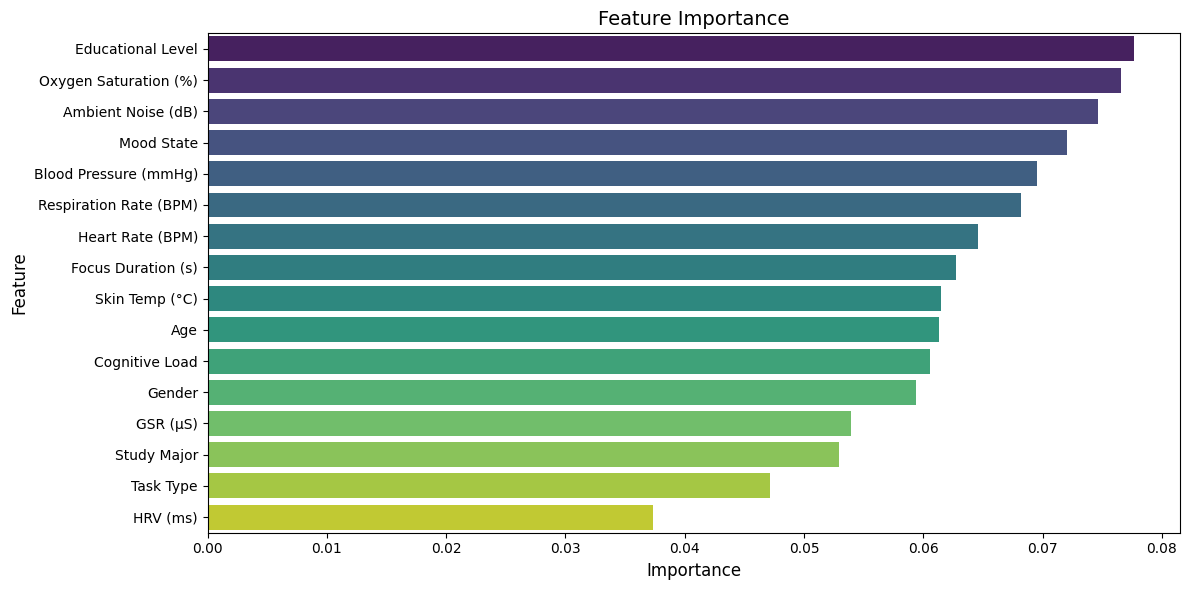

In [21]:
# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title("Feature Importance", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()


# Investigating Errors:
Some features, like "Focus Duration" and "Task Type," might need further refinement or exclusion.

The "Focus Duration" feature shows a significantly wide range in erroneous samples.

This could indicate that the model struggles with handling extreme values or variability in focus duration.


Features like "HRV (ms)", "GSR (μS)", and "Heart Rate (BPM)" have narrower distributions.
These tight ranges suggest the errors might not stem from variability in these features but from the relationship between these features and the target variable.
In the previous example HRV was also mentioned which might indicate that it has low correlation.

A personal note:
Because the data does not include "height" or "weight" or "sportive state", which can directly influence blood pressure in my opinion this might cause the high variability in blood pressure.
summary:

the model might have a hard time predicting those variables because they are missing.

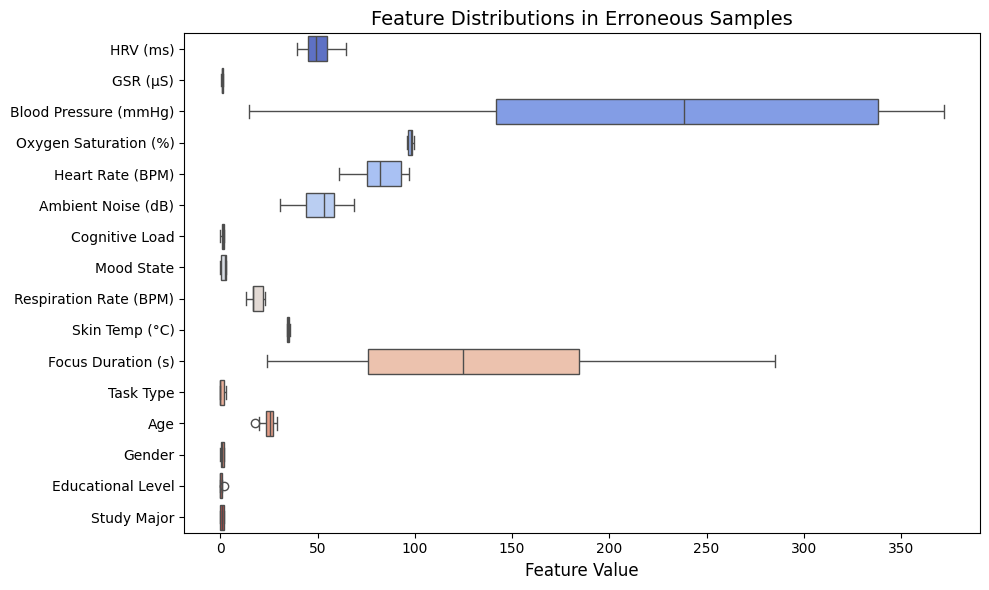

In [22]:
# 4. Investigate commonalities in erroneous samples
plt.figure(figsize=(10, 6))
sns.boxplot(data=worst_samples, orient="h", palette="coolwarm")
plt.title("Feature Distributions in Erroneous Samples", fontsize=14)
plt.xlabel("Feature Value", fontsize=12)
plt.tight_layout()
plt.show()